In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

In [ ]:
import yfinance as yfin
from pandas_datareader import data as pdr

In [ ]:
symbol=pd.read_csv('EQUITY_L.csv')

In [ ]:
symbol.head()

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE
0,20MICRONS,20 Microns Limited,EQ,06-OCT-2008,5.0,1,INE144J01027,5
1,21STCENMGM,21st Century Management Services Limited,EQ,03-MAY-1995,10.0,1,INE253B01015,10
2,3IINFOLTD,3i Infotech Limited,EQ,22-OCT-2021,10.0,1,INE748C01038,10
3,3MINDIA,3M India Limited,EQ,13-AUG-2004,10.0,1,INE470A01017,10
4,3PLAND,3P Land Holdings Limited,BE,19-JUL-1995,2.0,1,INE105C01023,2


In [ ]:
symbol=np.array(symbol)

In [ ]:
type(symbol[0][0])

str

In [ ]:
string=symbol[0][0]

In [ ]:
string

'20MICRONS'

In [ ]:
import datetime as dt
x=dt.date.today()
x=x-dt.timedelta(1)
y=x-dt.timedelta(120)

In [ ]:
# len(df)

In [ ]:
x

datetime.date(2023, 8, 13)

In [ ]:
(symbol.shape)[0]

1814

In [ ]:
def reverse_hammer(data,i):

    open_close=(data[i][3]-data[i][4])/data[i][3]*100
    open_close=abs(open_close)

    low=(data[i][2]-data[i][3])/data[i][2]*100
    low=abs(low)
    high=(data[i][1]-data[i][4])/data[i][1]*100
    high=abs(high)
    # print(open_close," ",high," ",low)
    if(open_close*3<high and low*3<high):
        #print(data[i][0])
        return(1)
    return(-1)


In [ ]:
def hammer(data,i):

    open_close=(data[i][3]-data[i][4])/data[i][3]*100
    open_close=abs(open_close)

    low=(data[i][2]-data[i][3])/data[i][2]*100
    low=abs(low)
    high=(data[i][1]-data[i][4])/data[i][1]*100
    high=abs(high)
    # print(open_close," ",high," ",low)
    if(open_close*3<low and high*3<low):
        #print(data[i][0])
        return(1)
    return(-1)

In [ ]:
def harebozo(data,i):

    open_close=(data[i][3]-data[i][4])/data[i][3]*100
    open_close=abs(open_close)

    low=(data[i][2]-data[i][3])/data[i][2]*100
    low=abs(low)
    high=(data[i][1]-data[i][4])/data[i][1]*100
    high=abs(high)
    # print(open_close," ",high," ",low)
    high_low=(data[i][1]-data[i][2])/data[i][1]*100
    high_low=abs(high_low)
    if((open_close>high*4 and open_close>low*4) or (open_close>high*5 and data[i][3]>data[i][1]) or(open_close>low*5 and data[i][4]>data[i][2]) ):

        #print(data[i][0])
        return(1)
    return(-1)


In [ ]:
def spin_top(data,i):

    open_close=(data[i][3]-data[i][4])/data[i][3]*100
    open_close=abs(open_close)

    low=(data[i][2]-data[i][3])/data[i][2]*100
    low=abs(low)
    high=(data[i][1]-data[i][4])/data[i][1]*100
    high=abs(high)
    # print(open_close," ",high," ",low)

    if(low>5*open_close and high>5*open_close and abs(high-low)<0.5):
        #print(data[i][0])
        return(1)
    return(-1)


In [ ]:
def func(data,curr):
    temp=curr
    dec=0
    inc=0
    while(curr>temp-5):
        if(data[curr][4]<data[curr-1][4]):
            dec=dec+1
        else:
            inc=inc+1
        curr=curr-1
    return(dec-inc)


In [ ]:
def check_pattern(data,i):

    if(hammer(data,i)==1 or reverse_hammer(data,i)==1 or spin_top(data,i)==1 or harebozo(data,i)==1):
         if(func(data,i)>0):
             return(1)
         else:
             return(-1)
    return(0)


In [ ]:
# def get_symbol(string,x,y):
#     try:
#         df=pdr.get_data_yahoo(string,start=x,end=y)
#         return df
#     except:
#         try:
#             df=pdr.get_data_yahoo(string+'.BO',start=x,end=y)
#             return df
#         except:
#             try:
#                 df=pdr.get_data_yahoo(string+'.NS',start=x,end=y)
#                 return df
#             except:
#                 df=pdr.get_data_yahoo('RELIANCE.NS',start=x,end=y)


In [ ]:
def get_symbol(string,x,y):
    yfin.pdr_override()
    df1=pdr.get_data_yahoo(string,start=x,end=y)
    yfin.pdr_override()
    df2=pdr.get_data_yahoo(string+'.NS',start=x,end=y)
    yfin.pdr_override()
    df3=pdr.get_data_yahoo(string+'.BO',start=x,end=y)
    if(len(df1)!=0):
      df=df1
    elif len(df2)!=0:
      df=df2
    elif len(df3)!=0:
      df=df3
    return df

In [ ]:
def piv_high(data,temp):
    count=0
    sum=0
    for i in range(temp-1,temp):
        sum=sum+data[i][1]
        count=count+1
    avg=sum/count
    return avg


In [ ]:
def piv_close(data,temp):
    count=0
    sum=0
    for i in range(temp-1,temp):
        sum=sum+data[i][4]
        count=count+1
    avg=sum/count
    return avg


In [ ]:
def piv_low(data,temp):
    count=0
    sum=0
    for i in range(temp-1,temp):
        sum=sum+data[i][2]
        count=count+1
    avg=sum/count
    return avg


In [ ]:
file=open('suggest.txt','w')
file.close()

In [ ]:
len(symbol)

1814

In [ ]:

file=open('suggest.txt','w')
i=1000
result=[]
while(i<len(symbol)-700):
    try:
        print("Index=",i)
        string=symbol[i][0]
        df=get_symbol(string,y,x)
        df=df.reset_index()
        print(df.head(2))
        print("\n")
        data=np.array(df)
        temp=(df.shape)[0]-1
        if(temp<4):
            i=i+1
            continue
        check=check_pattern(data,temp-1)
        print("check=",check)
        print("i=",i)
        print("check=",check)
        if(check>0):
            file.write("Company name=")
            file.write(symbol[i][1])
            file.write("\n")
            file.write("Suggestion=Buy stock\n")
            file.write("Entry price=")
            avg=data[temp-1][1]
            avg=avg+(avg*0.005)
            file.write(str(round(avg,2)))
            high=piv_high(data,temp-1)
            low=piv_low(data,temp-1)
            close=piv_close(data,temp-1)

            pp=(high+low+close)/3
            rr1=(2*pp)-low
            target1=rr1
            rr2=pp+(high-low)
            target2=rr2
            # file.write("\nTarget price 1=")
            # file.write(str(round(target1,2)))
            # file.write("\nTarget price 1=")
            # file.write(str(round(target2,2)))

            # file.write("\nStop loss=")
            # stop_loss=data[temp-1][2]
            # stop_loss=stop_loss-(stop_loss*0.002)
            # file.write(str(round(stop_loss,2)))
            file.write("\n\n")

            print("Company name=",symbol[i][1])
            print("Suggestion=Buy stock")
            print("Entry price=",avg)
            print("Target price1=",target1)
            print("Target price2=",target2)
            print("Stop loss",stop_loss)

            if(data[temp-1][4]<data[temp][4]):
                result.append([symbol[i][1],data[temp-1][0],'bullish','bullish'])
            else:
                result.append([symbol[i][1],data[temp-1][0],'bullish','bearish'])
            i=i+1
        elif check<0:
            file.write("Company name=")
            file.write(symbol[i][1])
            file.write("\n")
            file.write("Suggestion=Sell stock\n")
            file.write("Entry price=")
            avg=data[temp-1][1]
            avg=avg+(avg*0.005)
            file.write(str(round(avg,2)))
            high=piv_high(data,temp-1)
            low=piv_low(data,temp-1)
            close=piv_close(data,temp-1)

            pp=(high+low+close)/3
            rr1=(2*pp)-low
            target1=rr1
            rr2=pp+(high-low)
            target2=rr2
            # file.write("\nTarget price 1=")
            # file.write(str(round(target1,2)))
            # file.write("\nTarget price 2=")
            # file.write(str(round(target2,2)))

            # file.write("\nStop loss=")
            # stop_loss=data[temp-1][2]
            # stop_loss=stop_loss-(stop_loss*0.002)
            # file.write(str(round(stop_loss,2)))
            file.write("\n\n")

            print("Company name=",symbol[i][1])
            print("Suggestion=Sell stock")
            print("Target price1=",target1)
            print("Target price2=",target2)
            print("Stop loss",stop_loss)

            if(data[temp-1][4]<data[temp][4]):
                result.append([symbol[i][1],data[temp-1][0],'bearish','bullish'])
            else:
                result.append([symbol[i][1],data[temp-1][0],'bearish','bearish'])
            i=i+1
        else:
            i=i+1
    except:



        i=i+1
file.close()


Index= 1000
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAXIND']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAXIND.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  82.800003  83.500000  81.099998  82.400002  82.400002   54007
1 2023-04-18  83.099998  83.349998  82.000000  82.300003  82.300003   31833


check= 0
i= 1000
check= 0
Index= 1001
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAXVIL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  170.699997  178.750000  168.500000  176.600006  176.600006   
1 2023-04-18  175.000000  179.699997  169.350006  170.199997  170.199997   

   Volume  
0  143461  
1   71273  


check= 0
i= 1001
check= 0
Index= 1002
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAYURUNIQ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date   Open        High         Low       Close   Adj Close  Volume
0 2023-04-17  473.0  477.649994  462.049988  468.649994  468.649994   36343
1 2023-04-18  470.0  480.000000  468.450012  477.799988  477.799988   57448


check= 1
i= 1002
check= 1
Company name= Mayur Uniquoters Ltd
Suggestion=Buy stock
Entry price= 512.55
Target price1= 510.0333251953125
Target price2= 514.5166625976562
Stop loss 783.43
Index= 1003
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAZDA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAZDA.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date        Open   High         Low       Close   Adj Close  Volume
0 2023-04-17  645.700012  665.0  641.450012  659.450012  659.450012    6610
1 2023-04-18  664.000000  669.0  646.000000  655.650024  655.650024    2353


check= 0
i= 1003
check= 0
Index= 1004
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MAZDOCK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  701.349976  723.000000  695.200012  718.450012  718.450012   
1 2023-04-18  718.000000  726.799988  714.000000  716.200012  716.200012   

   Volume  
0  975845  
1  603489  


check= 0
i= 1004
check= 0
Index= 1005
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MBAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MBAPL.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  602.700012  612.250000  589.599976  606.000000  606.000000   
1 2023-04-18  614.900024  614.900024  580.599976  583.849976  583.849976   

   Volume  
0    7004  
1   14398  


check= 0
i= 1005
check= 0
Index= 1006
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MBECL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open  High  Low  Close  Adj Close  Volume
0 2023-04-17   4.3   4.3  4.3    4.3        4.3       0
1 2023-04-18   4.3   4.3  4.3    4.3        4.3       0


check= 0
i= 1006
check= 0
Index= 1007
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MBLINFRA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  18.049999  18.799999  17.549999  18.250000  18.250000   70663
1 2023-04-18  18.000000  18.900000  17.650000  18.549999  18.549999   59371


check= 0
i= 1007
check= 0
Index= 1008
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MCDHOLDING']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MCDHOLDING.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date   Open   High    Low  Close  Adj Close  Volume
0 2023-04-17  68.75  68.75  68.75  68.75      68.75       0
1 2023-04-18  68.75  68.75  68.75  68.75      68.75       0


check= 0
i= 1008
check= 0
Index= 1009
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MCDOWELL-N']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MCDOWELL-N.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date        Open        High    Low       Close   Adj Close   Volume
0 2023-04-17  764.849976  769.599976  759.5  765.450012  765.450012   771167
1 2023-04-18  768.700012  785.450012  762.0  775.000000  775.000000  1410292


check= 0
i= 1009
check= 0
Index= 1010
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MCL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-08-13)')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MCL.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  33.200001  33.200001  29.450001  30.299999  30.299999   66822
1 2023-04-18  30.299999  32.400002  30.299999  31.150000  31.150000   48521


check= 0
i= 1010
check= 0
Index= 1011
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MCLEODRUSS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  19.200001  19.850000  18.950001  19.850000  19.850000  199348
1 2023-04-18  20.799999  20.799999  20.250000  20.799999  20.799999  196612


check= 0
i= 1011
check= 0
Index= 1012
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MCX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-08-13)')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date         Open         High          Low        Close    Adj Close  \
0 2023-04-17  1467.000000  1478.599976  1457.199951  1474.650024  1474.650024   
1 2023-04-18  1476.300049  1492.050049  1446.000000  1450.500000  1450.500000   

   Volume  
0  189067  
1  181274  


check= 0
i= 1012
check= 0
Index= 1013
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MEDICAMEQ']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  714.349976  729.799988  710.450012  721.299988  721.299988   
1 2023-04-18  727.900024  775.000000  724.849976  761.900024  761.900024   

   Volume  
0    6409  
1   26649  


check= 0
i= 1013
check= 0
Index= 1014
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MEDPLUS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date   Open        High         Low       Close   Adj Close  Volume
0 2023-04-17  715.0  732.049988  711.049988  728.349976  728.349976   71495
1 2023-04-18  734.0  742.200012  725.000000  734.099976  734.099976   45277


check= 0
i= 1014
check= 0
Index= 1015
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MEGASOFT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  31.9  32.650002  30.299999  30.950001  30.950001  125411
1 2023-04-18  30.5  32.599998  30.049999  30.700001  30.700001  133989


check= 0
i= 1015
check= 0
Index= 1016
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MEGASTAR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date   Open        High         Low       Close   Adj Close  Volume
0 2023-04-17  227.0  233.699997  226.350006  231.600006  231.600006    4559
1 2023-04-18  250.0  250.000000  232.050003  234.949997  234.949997    5486


check= -1
i= 1016
check= -1
Company name= Megastar Foods Limited
Suggestion=Sell stock
Target price1= 296.0
Target price2= 296.0
Stop loss 783.43
Index= 1017
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MELSTAR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open  High   Low  Close  Adj Close  Volume
0 2023-04-17  2.15  2.35  2.15   2.35       2.35     825
1 2023-04-18  2.35  2.45  2.35   2.40       2.40     937


check= -1
i= 1017
check= -1
Company name= Melstar Information Technologies Limited
Suggestion=Sell stock
Target price1= 1.883333365122477
Target price2= 1.8166666825612385
Stop loss 783.43
Index= 1018
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MENONBE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High     Low       Close   Adj Close  Volume
0 2023-04-17  102.949997  104.000000  102.50  103.400002  101.633484   19665
1 2023-04-18  104.000000  107.849998  102.25  104.199997  102.419815   99852


check= -1
i= 1018
check= -1
Company name= Menon Bearings Limited
Suggestion=Sell stock
Target price1= 134.26666768391925
Target price2= 132.23333231608072
Stop loss 783.43
Index= 1019
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MEP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-08-13)')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date   Open  High    Low  Close  Adj Close   Volume
0 2023-04-17  14.10  14.7  14.10  14.45      14.45   208637
1 2023-04-18  14.35  15.0  14.35  14.65      14.65  1071300


check= 0
i= 1019
check= 0
Index= 1020
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MERCATOR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MERCATOR.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date  Open  High   Low  Close  Adj Close  Volume
0 2023-04-17  0.85  0.85  0.85   0.85       0.85       0
1 2023-04-18  0.85  0.85  0.85   0.85       0.85       0


check= 0
i= 1020
check= 0
Index= 1021
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['METALFORGE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open  High  Low  Close  Adj Close  Volume
0 2023-04-17  3.15  3.15  3.0   3.15       3.15    6587
1 2023-04-18  3.10  3.30  3.1   3.30       3.30    6421


check= 0
i= 1021
check= 0
Index= 1022
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['METROBRAND']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  800.400024  818.000000  796.549988  812.950012  812.950012   
1 2023-04-18  813.000000  824.200012  796.599976  800.900024  800.900024   

   Volume  
0   65023  
1   71726  


check= 1
i= 1022
check= 1
Company name= Metro Brands Limited
Suggestion=Buy stock
Entry price= 1075.9529754638672
Target price1= 1069.750040690104
Target price2= 1071.9500325520833
Stop loss 783.43
Index= 1023
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['METROPOLIS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date         Open         High          Low        Close    Adj Close  \
0 2023-04-17  1288.949951  1297.199951  1264.599976  1288.550049  1288.550049   
1 2023-04-18  1286.000000  1308.449951  1276.150024  1295.449951  1295.449951   

   Volume  
0  112487  
1  177567  


check= 0
i= 1023
check= 0
Index= 1024
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MFL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date         Open         High          Low        Close    Adj Close  \
0 2023-04-17  1014.950012  1108.900024  1010.400024  1074.349976  1072.024536   
1 2023-04-18  1074.400024  1100.550049  1058.099976  1067.650024  1065.339111   

   Volume  
0  248534  
1   57237  


check= 0
i= 1024
check= 0
Index= 1025
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MFSL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open   High         Low       Close   Adj Close  Volume
0 2023-04-17  629.000000  640.0  621.299988  637.500000  637.500000  340781
1 2023-04-18  639.799988  652.0  632.799988  649.900024  649.900024  685032


check= 0
i= 1025
check= 0
Index= 1026
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MGEL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MGEL.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date       Open       High        Low  Close  Adj Close  Volume
0 2023-04-17  21.150000  21.150000  19.799999  21.15  21.126947  385867
1 2023-04-18  21.700001  22.200001  21.200001  22.00  21.976021  354367


check= 0
i= 1026
check= 0
Index= 1027
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MGL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-08-13)')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date         Open    High          Low        Close    Adj Close  \
0 2023-04-17   982.000000  1015.0   982.000000  1013.849976   997.806458   
1 2023-04-18  1007.799988  1035.0  1004.400024  1018.000000  1001.890808   

    Volume  
0   655253  
1  1038085  


check= 0
i= 1027
check= 0
Index= 1028
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MHLXMIRU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  300.000000  300.250000  287.850006  290.149994  290.149994   
1 2023-04-18  287.049988  295.700012  286.299988  290.500000  290.500000   

   Volume  
0   49128  
1   54650  


check= 1
i= 1028
check= 1
Company name= Mahalaxmi Rubtech Limited
Suggestion=Buy stock
Entry price= 159.795
Target price1= 161.98333231608075
Target price2= 161.71666463216147
Stop loss 783.43
Index= 1029
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MHRIL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  291.500000  297.399994  289.850006  293.850006  293.850006   
1 2023-04-18  293.899994  295.000000  288.100006  292.799988  292.799988   

   Volume  
0  244093  
1  107324  


check= 0
i= 1029
check= 0
Index= 1030
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MICEL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MICEL.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date  Open   High    Low  Close  Adj Close  Volume
0 2023-04-17  12.2  12.75  12.20  12.35      12.35   65421
1 2023-04-18  12.6  12.60  11.75  12.10      12.10  169546


check= 0
i= 1030
check= 0
Index= 1031
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MIDHANI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date   Open        High         Low       Close   Adj Close  Volume
0 2023-04-17  195.0  196.949997  193.250000  195.300003  195.300003  130604
1 2023-04-18  196.0  196.949997  191.899994  193.699997  193.699997  141687


check= 0
i= 1031
check= 0
Index= 1032
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDACORP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  266.899994  266.899994  260.500000  262.850006  262.154755   
1 2023-04-18  262.899994  269.200012  257.649994  261.200012  260.509125   

   Volume  
0  826500  
1  895505  


check= 0
i= 1032
check= 0
Index= 1033
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDAIND']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDAIND.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDAIND.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



Index= 1034
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDTECK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  128.500000  128.500000  119.050003  122.500000  121.502037   
1 2023-04-18  122.300003  126.199997  119.000000  120.650002  119.667107   

   Volume  
0   23380  
1   23306  


check= 0
i= 1034
check= 0
Index= 1035
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDTREE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDTREE.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MINDTREE.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



Index= 1036
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MIRCELECTR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date   Open   High    Low  Close  Adj Close  Volume
0 2023-04-17  13.95  14.50  13.40  14.15      14.15  538809
1 2023-04-18  14.20  14.85  13.95  14.15      14.15  335034


check= 0
i= 1036
check= 0
Index= 1037
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MIRZAINT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-04-17  35.049999  35.049999  33.500000  35.000000  35.000000  1271563
1 2023-04-18  35.799999  42.000000  35.700001  41.599998  41.599998  7143117


check= 0
i= 1037
check= 0
Index= 1038
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MITTAL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MITTAL.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date   Open   High    Low  Close  Adj Close  Volume
0 2023-04-17  12.75  12.75  11.25  11.45      11.45   80917
1 2023-04-18  11.30  11.80  11.30  11.35      11.35   45553


check= 0
i= 1038
check= 0
Index= 1039
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMFL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  820.150024  849.000000  820.150024  839.250000  833.312256   
1 2023-04-18  847.650024  865.799988  834.700012  851.349976  845.326599   

   Volume  
0    9202  
1  111940  


check= 0
i= 1039
check= 0
Index= 1040
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MMP.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-04-17  56.139999  56.400002  55.599998  56.180000   54.23502  1727000
1 2023-04-18  56.389999  56.880001  56.119999  56.599998   54.64048   542700


check= 0
i= 1040
check= 0
Index= 1041
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date    Open    High     Low   Close  Adj Close  Volume
0 2023-04-17  0.0003  0.0003  0.0003  0.0003     0.0003       0
1 2023-04-18  0.0003  0.0003  0.0003  0.0003     0.0003       0


check= 0
i= 1041
check= 0
Index= 1042
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MODIRUBBER']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open  High   Low  Close  Adj Close  Volume
0 2023-04-17  62.0  62.5  62.0   62.5       62.5     107
1 2023-04-18  62.5  63.0  62.0   63.0       63.0     174


check= -1
i= 1042
check= -1
Company name= Modi Rubber Limited
Suggestion=Sell stock
Target price1= 68.23333231608072
Target price2= 67.96666463216145
Stop loss 783.43
Index= 1043
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MODISNME']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MODISNME.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MODISNME.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



Index= 1044
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOHITIND']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open   High    Low  Close  Adj Close  Volume
0 2023-04-17  13.1  13.50  12.65  12.75      12.75    4760
1 2023-04-18  12.8  13.95  12.40  13.35      13.35   27067


check= 0
i= 1044
check= 0
Index= 1045
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOHOTAIND']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open  High  Low  Close  Adj Close  Volume
0 2023-04-17   4.0   4.4  4.0    4.0        4.0   10605
1 2023-04-18   4.0   4.0  4.0    4.0        4.0       0


check= 0
i= 1045
check= 0
Index= 1046
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOIL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-08-13)')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date    Open    High         Low       Close   Adj Close  Volume
0 2023-04-17  152.25  153.75  150.699997  152.500000  152.500000  109046
1 2023-04-18  151.25  154.50  151.250000  153.899994  153.899994   98738


check= 0
i= 1046
check= 0
Index= 1047
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOKSH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOKSH.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date  Open  High   Low  Close  Adj Close  Volume
0 2023-04-17  9.75  10.0  9.55    9.8        9.8   77468
1 2023-04-18  9.90  10.0  9.70    9.8        9.8   48348


check= 0
i= 1047
check= 0
Index= 1048
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date   Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  91.25  91.500000  87.800003  88.250000  86.845222  635573
1 2023-04-18  88.25  91.900002  88.250000  90.150002  88.714981  392548


check= -1
i= 1048
check= -1
Company name= Meghmani Organics Limited
Suggestion=Sell stock
Target price1= 84.13333129882812
Target price2= 83.91666412353516
Stop loss 783.43
Index= 1049
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOLDTECH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOLDTECH.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  271.700012  287.000000  270.149994  282.649994  280.716034   
1 2023-04-18  287.000000  292.149994  276.500000  281.100006  279.176636   

   Volume  
0  244965  
1  224470  


check= 0
i= 1049
check= 0
Index= 1050
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOLDTKPAC']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  936.200012  956.000000  936.049988  949.700012  945.629517   
1 2023-04-18  955.400024  959.400024  940.099976  943.250000  939.207153   

   Volume  
0   23226  
1   15409  


check= 0
i= 1050
check= 0
Index= 1051
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MONARCH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  218.149994  224.750000  213.600006  215.399994  215.399994   
1 2023-04-18  214.800003  220.949997  194.100006  206.350006  206.350006   

   Volume  
0   75963  
1   88276  


check= 0
i= 1051
check= 0
Index= 1052
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MONTECARLO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date   Open        High         Low       Close   Adj Close  Volume
0 2023-04-17  670.0  693.400024  668.400024  683.250000  683.250000  109641
1 2023-04-18  690.0  699.000000  684.000000  695.349976  695.349976   39321


check= 0
i= 1052
check= 0
Index= 1053
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MORARJEE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open  High   Low      Close  Adj Close  Volume
0 2023-04-17  19.600000  20.0  19.1  19.549999  19.549999    8335
1 2023-04-18  20.049999  20.1  19.0  19.299999  19.299999   23734


check= 0
i= 1053
check= 0
Index= 1054
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOREPENLAB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open   High        Low      Close  Adj Close   Volume
0 2023-04-17  27.400000  27.85  27.049999  27.450001  27.450001  2944982
1 2023-04-18  27.549999  27.75  27.049999  27.200001  27.200001  2275489


check= 0
i= 1054
check= 0
Index= 1055
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOTHERSUMI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOTHERSUMI.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOTHERSUMI.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



Index= 1056
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOTILALOFS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  630.250000  637.599976  619.000000  622.299988  619.773071   
1 2023-04-18  622.299988  623.549988  605.049988  613.250000  610.759827   

   Volume  
0   54855  
1  101463  


check= 0
i= 1056
check= 0
Index= 1057
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MOTOGENFIN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open  High    Low      Close  Adj Close  Volume
0 2023-04-17  32.000000  33.5  32.00  32.950001  32.950001    4488
1 2023-04-18  32.599998  33.5  31.35  31.650000  31.650000    6883


check= 0
i= 1057
check= 0
Index= 1058
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MPHASIS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date         Open         High          Low        Close    Adj Close  \
0 2023-04-17  1749.949951  1749.949951  1660.050049  1736.550049  1691.222290   
1 2023-04-18  1744.000000  1789.000000  1733.750000  1783.800049  1737.239014   

    Volume  
0  1218305  
1   390524  


check= 0
i= 1058
check= 0
Index= 1059
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MPSLTD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  910.549988  910.549988  877.599976  895.849976  866.026611   
1 2023-04-18  895.849976  937.000000  895.000000  930.099976  899.136475   

   Volume  
0   39373  
1   35744  


check= 0
i= 1059
check= 0
Index= 1060
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRF']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-08-13)')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date     Open     High           Low         Close     Adj Close  \
0 2023-04-17  85499.0  85700.0  85001.000000  85376.351562  85235.882812   
1 2023-04-18  85500.0  87495.0  85487.453125  86821.351562  86678.507812   

   Volume  
0    2573  
1    6492  


check= 0
i= 1060
check= 0
Index= 1061
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRO-TEK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  57.500000  57.700001  57.000000  57.049999  57.049999    6909
1 2023-04-18  58.950001  59.000000  57.200001  57.599998  57.599998    4816


check= 0
i= 1061
check= 0
Index= 1062
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MRPL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-04-17  53.299999  53.700001  52.849998  53.549999  53.549999  1020748
1 2023-04-18  53.500000  54.450001  53.349998  53.750000  53.750000  1393194


check= 0
i= 1062
check= 0
Index= 1063
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSPL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open  High   Low  Close  Adj Close  Volume
0 2023-04-17  9.10  9.10  8.80    8.9        8.9   66629
1 2023-04-18  8.95  9.05  8.65    8.9        8.9  138851


check= 0
i= 1063
check= 0
Index= 1064
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSTCLTD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MSTCLTD.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  269.000000  277.600006  266.000000  270.399994  270.399994   
1 2023-04-18  270.950012  272.500000  267.299988  269.149994  269.149994   

   Volume  
0  224824  
1  100489  


check= -1
i= 1064
check= -1
Company name= Mstc Limited
Suggestion=Sell stock
Target price1= 459.41667683919275
Target price2= 461.3833414713542
Stop loss 783.43
Index= 1065
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTARTECH']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date         Open         High          Low        Close    Adj Close  \
0 2023-04-17  1703.699951  1772.449951  1692.150024  1755.300049  1755.300049   
1 2023-04-18  1735.000000  1777.099976  1735.000000  1768.199951  1768.199951   

   Volume  
0  223731  
1  132297  


check= 0
i= 1065
check= 0
Index= 1066
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTEDUCARE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open  High   Low  Close  Adj Close  Volume
0 2023-04-17  4.55  4.55  4.25   4.50       4.50   31415
1 2023-04-18  4.50  4.70  4.40   4.55       4.55   15166


check= 0
i= 1066
check= 0
Index= 1067
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MTNL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-04-17  19.049999  19.299999  18.799999  19.000000  19.000000   981556
1 2023-04-18  19.100000  19.400000  18.799999  18.950001  18.950001  1312558


check= 0
i= 1067
check= 0
Index= 1068
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUKANDENGG']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUKANDENGG.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-08-13)')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUKANDENGG.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



Index= 1069
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUKANDLTD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High    Low   Close   Adj Close  Volume
0 2023-04-17  136.899994  136.899994  132.5  134.25  132.334198   95959
1 2023-04-18  134.649994  135.949997  129.0  130.50  128.637711  181994


check= 0
i= 1069
check= 0
Index= 1070
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUKTAARTS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open   High        Low      Close  Adj Close  Volume
0 2023-04-17  48.400002  50.75  48.400002  50.049999  50.049999    7254
1 2023-04-18  50.849998  51.00  49.500000  50.200001  50.200001    4277


check= 0
i= 1070
check= 0
Index= 1071
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUNJALAU']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  40.950001  41.049999  40.049999  40.599998  40.599998   32812
1 2023-04-18  40.900002  42.200001  40.450001  41.450001  41.450001   50045


check= 0
i= 1071
check= 0
Index= 1072
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUNJALSHOW']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  91.500000  91.900002  90.599998  91.500000  85.841408    8083
1 2023-04-18  91.699997  92.800003  91.550003  92.150002  86.451210    6963


check= 0
i= 1072
check= 0
Index= 1073
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MURUDCERA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  34.200001  34.849998  33.599998  33.799999  33.799999   25341
1 2023-04-18  34.000000  35.799999  33.799999  35.099998  35.099998   51702


check= 0
i= 1073
check= 0
Index= 1074
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUTHOOTCAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUTHOOTCAP.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  271.899994  272.149994  264.950012  270.149994  270.149994   
1 2023-04-18  271.850006  274.899994  269.200012  271.000000  271.000000   

   Volume  
0   16448  
1   13434  


check= 0
i= 1074
check= 0
Index= 1075
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['MUTHOOTFIN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date         Open         High          Low        Close    Adj Close  \
0 2023-04-17  1033.300049  1053.699951  1027.500000  1048.849976  1026.849976   
1 2023-04-18  1030.000000  1078.300049  1024.099976  1050.199951  1050.199951   

    Volume  
0   504163  
1  1481851  


check= 0
i= 1075
check= 0
Index= 1076
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NACLIND']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High    Low      Close  Adj Close  Volume
0 2023-04-17  88.250000  88.250000  85.75  86.400002  86.400002   37153
1 2023-04-18  87.400002  87.400002  85.50  85.599998  85.599998   42877


check= 0
i= 1076
check= 0
Index= 1077
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAGAFERT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAGAFERT.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date   Open   High   Low  Close  Adj Close   Volume
0 2023-04-17  12.35  12.35  11.9  12.35      12.35  1846423
1 2023-04-18  12.95  12.95  12.0  12.95      12.95  4497910


check= 0
i= 1077
check= 0
Index= 1078
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAGREEKCAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low  Close  Adj Close  Volume
0 2023-04-17  20.200001  21.900000  20.200001  21.90      21.90   23957
1 2023-04-18  22.000000  22.950001  20.799999  20.85      20.85   86449


check= 0
i= 1078
check= 0
Index= 1079
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAGREEKEXP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  33.849998  34.049999  32.799999  33.200001  33.200001    2266
1 2023-04-18  33.349998  33.900002  32.000000  32.349998  32.349998   14334


check= 1
i= 1079
check= 1
Company name= Nagreeka Exports Limited
Suggestion=Buy stock
Entry price= 49.0942484664917
Target price1= 47.8000005086263
Target price2= 47.949999491373696
Stop loss 783.43
Index= 1080
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAHARCAP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  262.149994  268.899994  262.049988  265.299988  265.299988   
1 2023-04-18  265.299988  275.950012  263.899994  268.049988  268.049988   

   Volume  
0    4420  
1   15638  


check= 0
i= 1080
check= 0
Index= 1081
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAHARINDUS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  97.300003  97.500000  94.500000  95.199997  95.199997   35223
1 2023-04-18  94.550003  98.449997  94.550003  97.000000  97.000000   31159


check= 0
i= 1081
check= 0
Index= 1082
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAHARPOLY']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open   High         Low       Close   Adj Close  Volume
0 2023-04-17  242.100006  242.5  235.350006  237.550003  237.550003   15364
1 2023-04-18  240.000000  245.0  236.100006  238.750000  238.750000   25009


check= 1
i= 1082
check= 1
Company name= Nahar Poly Films Limited
Suggestion=Buy stock
Entry price= 229.39125
Target price1= 234.16666666666669
Target price2= 229.98332722981772
Stop loss 783.43
Index= 1083
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAHARSPING']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  265.149994  267.000000  261.049988  262.200012  262.200012   
1 2023-04-18  258.049988  276.799988  258.049988  267.350006  267.350006   

   Volume  
0   17530  
1   64480  


check= 0
i= 1083
check= 0
Index= 1084
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAM-INDIA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  236.449997  240.000000  234.500000  239.050003  225.364212   
1 2023-04-18  239.899994  239.899994  236.550003  238.050003  224.421448   

    Volume  
0  2218541  
1   192920  


check= 0
i= 1084
check= 0
Index= 1085
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NATCOPHARM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  574.950012  574.950012  568.299988  569.799988  569.799988   
1 2023-04-18  570.500000  575.000000  565.099976  566.250000  566.250000   

   Volume  
0  193610  
1  440093  


check= 0
i= 1085
check= 0
Index= 1086
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NATHBIOGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  150.399994  158.199997  150.399994  155.949997  151.013275   
1 2023-04-18  155.000000  161.500000  154.550003  160.399994  155.322403   

   Volume  
0   21990  
1   24976  


check= 0
i= 1086
check= 0
Index= 1087
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NATIONALUM']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-04-17  79.550003  81.650002  79.250000  81.400002  81.400002  5847694
1 2023-04-18  81.199997  82.900002  81.150002  82.699997  82.699997  5503665


check= 0
i= 1087
check= 0
Index= 1088
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NATNLSTEEL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NATNLSTEEL.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NATNLSTEEL.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



Index= 1089
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAUKRI']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date         Open    High          Low        Close    Adj Close  \
0 2023-04-17  3778.000000  3778.0  3603.949951  3664.149902  3649.686035   
1 2023-04-18  3674.949951  3718.0  3657.149902  3704.550049  3689.926514   

   Volume  
0  349558  
1  136275  


check= 1
i= 1089
check= 1
Company name= Info Edge (India) Limited
Suggestion=Buy stock
Entry price= 4703.4
Target price1= 4697.433430989584
Target price2= 4704.516764322917
Stop loss 783.43
Index= 1090
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAVINFLUOR']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date    Open    High          Low        Close    Adj Close  Volume
0 2023-04-17  4515.0  4549.5  4465.000000  4531.899902  4518.164062   84737
1 2023-04-18  4550.0  4625.0  4522.200195  4608.250000  4594.282715  163275


check= 0
i= 1090
check= 0
Index= 1091
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAVKARCORP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  54.799999  54.799999  53.900002  54.299999  54.299999  223286
1 2023-04-18  54.599998  56.799999  54.099998  55.299999  55.299999  734774


check= -1
i= 1091
check= -1
Company name= Navkar Corporation Limited
Suggestion=Sell stock
Target price1= 60.60000101725261
Target price2= 59.050000508626304
Stop loss 783.43
Index= 1092
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAVNETEDUL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low   Close   Adj Close  Volume
0 2023-04-17  105.949997  112.449997  104.300003  111.50  109.481194  409549
1 2023-04-18  111.500000  114.750000  111.000000  114.25  112.181404  321884


check= 0
i= 1092
check= 0
Index= 1093
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NAZARA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High    Low       Close   Adj Close  Volume
0 2023-04-17  538.099976  539.450012  518.5  524.750000  524.750000  263882
1 2023-04-18  526.349976  529.700012  515.0  517.900024  517.900024  142465


check= 0
i= 1093
check= 0
Index= 1094
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  21.322001  21.322001  21.315001  21.315001  21.315001     100
1 2023-04-18  21.497999  21.497999  21.497999  21.497999  21.497999       0


check= 0
i= 1094
check= 0
Index= 1095
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NBIFIN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NBIFIN.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date    Open         High          Low        Close    Adj Close  \
0 2023-04-17  1485.0  1509.599976  1406.050049  1505.400024  1504.615234   
1 2023-04-18  1500.0  1515.000000  1479.199951  1486.500000  1485.725098   

   Volume  
0     299  
1      67  


check= 0
i= 1095
check= 0
Index= 1096
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NBVENTURES']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NBVENTURES.NS']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NBVENTURES.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



Index= 1097
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NCC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-08-13)')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date   Open        High         Low       Close   Adj Close   Volume
0 2023-04-17  107.0  110.800003  106.699997  109.599998  109.599998  6014972
1 2023-04-18  109.5  110.500000  108.250000  109.150002  109.150002  2322761


check= 0
i= 1097
check= 0
Index= 1098
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NCLIND']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open    High    Low       Close   Adj Close  Volume
0 2023-04-17  181.699997  185.00  178.5  184.350006  184.350006  116265
1 2023-04-18  185.750000  185.75  181.0  183.350006  183.350006   80201


check= 0
i= 1098
check= 0
Index= 1099
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NDGL']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NDGL.BO']: Exception('%ticker%: No timezone found, symbol may be delisted')



        Date    Open         High          Low        Close    Adj Close  \
0 2023-04-17  1340.0  1398.800049  1340.000000  1388.750000  1388.750000   
1 2023-04-18  1390.0  1397.000000  1350.050049  1392.849976  1392.849976   

   Volume  
0      61  
1      24  


check= 0
i= 1099
check= 0
Index= 1100
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NDL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-04-15 -> 2023-08-13)')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High   Low      Close  Adj Close  Volume
0 2023-04-17  22.450001  22.450001  21.5  21.799999  21.799999   68844
1 2023-04-18  21.500000  23.400000  21.5  22.750000  22.750000  194575


check= 0
i= 1100
check= 0
Index= 1101
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NDRAUTO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date   Open        High         Low       Close   Adj Close  Volume
0 2023-04-17  316.0  317.450012  307.024994  310.825012  309.215515   16978
1 2023-04-18  315.0  316.424988  302.500000  305.649994  304.067291   10414


check= 0
i= 1101
check= 0
Index= 1102
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NDTV']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  193.899994  193.899994  187.050003  188.199997  188.199997   
1 2023-04-18  188.500000  190.949997  186.500000  187.100006  187.100006   

   Volume  
0  217998  
1  117213  


check= 1
i= 1102
check= 1
Company name= New Delhi Television Limited
Suggestion=Buy stock
Entry price= 223.6627530670166
Target price1= 221.4833272298177
Target price2= 220.76665751139322
Stop loss 783.43
Index= 1103
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NECCLTD']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open   High        Low      Close  Adj Close  Volume
0 2023-04-17  18.700001  19.25  18.549999  18.900000  18.900000   85177
1 2023-04-18  19.250000  19.25  17.799999  18.450001  18.450001   66573


check= -1
i= 1103
check= -1
Company name= North Eastern Carrying Corporation Limited
Suggestion=Sell stock
Target price1= 19.049999237060547
Target price2= 18.94999885559082
Stop loss 783.43
Index= 1104
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NECLIFE']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open   High        Low  Close  Adj Close  Volume
0 2023-04-17  17.549999  17.75  17.150000   17.4       17.4  119728
1 2023-04-18  17.549999  17.90  17.450001   17.6       17.6  187776


check= 0
i= 1104
check= 0
Index= 1105
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NELCAST']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close  Volume
0 2023-04-17  93.199997  95.599998  91.500000  92.099998  91.408081  205493
1 2023-04-18  91.500000  94.000000  91.400002  93.150002  92.450203  164593


check= 0
i= 1105
check= 0
Index= 1106
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NELCO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open   High         Low       Close   Adj Close  Volume
0 2023-04-17  547.799988  555.0  537.200012  553.299988  551.552063   91952
1 2023-04-18  560.000000  563.0  543.049988  546.750000  545.022766   45213


check= 1
i= 1106
check= 1
Company name= NELCO Limited
Suggestion=Buy stock
Entry price= 788.925
Target price1= 777.5833536783855
Target price2= 780.5166829427084
Stop loss 783.43
Index= 1107
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NEOGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date         Open         High          Low        Close    Adj Close  \
0 2023-04-17  1624.949951  1644.900024  1609.050049  1637.949951  1637.949951   
1 2023-04-18  1623.300049  1642.900024  1604.949951  1612.800049  1612.800049   

   Volume  
0  167220  
1   41075  


check= 0
i= 1107
check= 0
Index= 1108
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NESCO']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  540.200012  540.200012  529.200012  531.599976  527.986084   
1 2023-04-18  532.200012  534.549988  526.299988  529.599976  525.999695   

   Volume  
0   47091  
1   36132  


check= 0
i= 1108
check= 0
Index= 1109
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NESTLEIND']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date     Open     High           Low         Close     Adj Close  \
0 2023-04-17  19590.0  20410.0  19502.150391  20244.400391  20143.539062   
1 2023-04-18  20200.0  20700.0  20200.000000  20661.250000  20558.312500   

   Volume  
0  194351  
1  139860  


check= 0
i= 1109
check= 0
Index= 1110
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NETWORK18']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-04-17  55.200001  58.400002  55.200001  57.349998  57.349998  3453711
1 2023-04-18  54.000000  56.599998  53.150002  55.400002  55.400002  2144175


check= 0
i= 1110
check= 0
Index= 1111
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NEULANDLAB']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date    Open         High     Low        Close    Adj Close  Volume
0 2023-04-17  2075.0  2115.000000  2005.0  2054.750000  2047.682739   44216
1 2023-04-18  2055.0  2081.449951  2016.0  2056.050049  2048.978271   32399


check= 0
i= 1111
check= 0
Index= 1112
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NEWGEN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2023-04-17  455.000000  468.049988  446.299988  457.000000  449.998810   
1 2023-04-18  452.549988  471.899994  452.549988  468.649994  461.470337   

   Volume  
0  104920  
1   85697  


check= 0
i= 1112
check= 0
Index= 1113
[*********************100%***********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NEXTMEDIA']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
        Date  Open  High  Low  Close  Adj Close  Volume
0 2023-04-17  5.15  5.15  4.8   4.95       4.95    3260
1 2023-04-18  4.90  5.05  4.8   4.90       4.90    1382


check= 0
i= 1113
check= 0


In [ ]:
res_df=pd.DataFrame(result,columns=['Date','Company Name','Prediction','Actual'])

In [ ]:
res_df.to_csv('prediction_res.csv')

In [ ]:
count=0
b=0
for i in range(len(result)):
    if(result[i][2]==result[i][3] and result[i][2]=='bullish'):
        count=count+1
    elif(result[i][2]==result[i][3] and result[i][2]=='bearish'):
        b=b+1

In [ ]:
acq=(count+b)/len(result)

In [ ]:
print("The accuraccy is=",round(acq,2))

The accuraccy is= 0.56


In [ ]:
arr = res_df.to_numpy()

In [ ]:
actual=[]
predicted=[]
for i in range (len(arr)):
  actual.append(arr[i][2])
  predicted.append(arr[i][3])

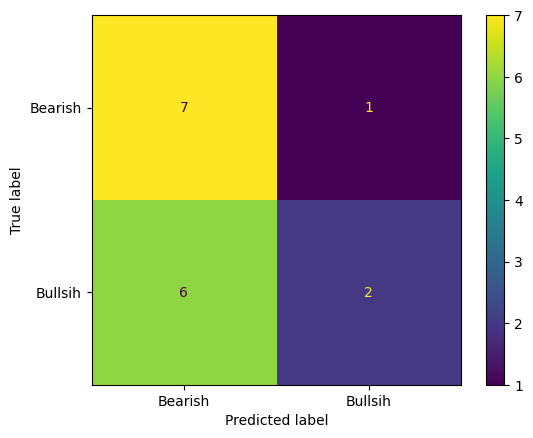

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bearish', 'Bullsih'])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()